In [2]:
import pickle
import matplotlib.pyplot as plt
from astropy.io import fits
from fittingtask import FittingTask
import os
import numpy as np
homedir = os.path.expanduser('~')

In [3]:
datadir = f"{homedir}/uoedrive/data/"
archivfile = "CRIRES/fainterspectral-fits_6.pickle"
telluricfile = "telluric/transdata_0,5-14_mic_hires.fits"
ft = FittingTask.from_archive(datadir+archivfile)

/Users/xqchen/workspace/dopplerimg/code/fittingtask.py:63: RuntimeWarning: divide by zero encountered in divide
  self.weight_obs = 1./self.error_obs**2


#### Fit Callie Models

In [97]:
modeldir = "CallieModels"
rescallie = ft.fit_many_models(
    datadir+modeldir, 
    include_telluric=True, 
    telluricfile=datadir+telluricfile)

fitting model t1500g1000f4_m0.0_co1.0.fits...


/Users/spacegrey/workspace/dopplerimg/code/modelfitting.py:711: RuntimeWarning: invalid value encountered in sqrt
  ret = (4*(1.-epsilon) * np.sqrt(lamdel2) + np.pi*epsilon*lamdel2) / \


Optimization terminated successfully.
         Current function value: 20.774345
         Iterations: 2088
         Function evaluations: 2966
Optimization terminated successfully.
         Current function value: 200.447480
         Iterations: 3145
         Function evaluations: 4455
Optimization terminated successfully.
         Current function value: 199.110169
         Iterations: 1686
         Function evaluations: 2413
Optimization terminated successfully.
         Current function value: 114.266880
         Iterations: 2127
         Function evaluations: 2979
fitting model t1500g1000f3_m0.0_co1.0.fits...
Optimization terminated successfully.
         Current function value: 39.367809
         Iterations: 2882
         Function evaluations: 4048
Optimization terminated successfully.
         Current function value: 196.123631
         Iterations: 4449
         Function evaluations: 6273
Optimization terminated successfully.
         Current function value: 245.744709
         I

In [120]:
# save as pickle
with open("result_fit_all_callie.pickle", "wb") as f:
    pickle.dump(rescallie, f)

In [99]:
# print band averaged
for key, item in rescallie.items():
    print(f"model:{key} fmin:{np.array([item['fit'][j][1] for j in range(4)]).mean()}")

model:t1500g1000f4_m0.0_co1.0.fits fmin:133.64971871415764
model:t1500g1000f3_m0.0_co1.0.fits fmin:164.77725709666174
model:t1500g1000nc_m0.0_co1.0.fits fmin:173.31237602091608
model:t1400g1000f2_m0.0_co1.0.fits fmin:206.50799963236162
model:t1500g1000f2_m0.0_co1.0.fits fmin:200.01920099736424
model:t1400g1000nc_m0.0_co1.0.fits fmin:333.3142886779968
model:t1400g1000f3_m0.0_co1.0.fits fmin:131.74647986472124
model:t1400g1000f4_m0.0_co1.0.fits fmin:89.59579618094303
model:t1400g1000f1_m0.0_co1.0.fits fmin:266.12258855440325
model:t1500g1000f8_m0.0_co1.0.fits fmin:39.76348988315572
model:t1400g1000f8_m0.0_co1.0.fits fmin:210.5585356073231
model:t1500g1000f1_m0.0_co1.0.fits fmin:244.21141542651606


In [101]:
# print all bands
for key, item in rescallie.items():
    print(f"model:{key} fmin:{[item['fit'][j][1] for j in range(4)]}")

model:t1500g1000f4_m0.0_co1.0.fits fmin:[20.77434511649509, 200.44748032727085, 199.11016893102132, 114.26688048184329]
model:t1500g1000f3_m0.0_co1.0.fits fmin:[39.367809335924804, 196.12363060499823, 245.74470868329345, 177.87287976243047]
model:t1500g1000nc_m0.0_co1.0.fits fmin:[85.97810296406819, 155.60204875441246, 216.42679449915374, 235.24255786602987]
model:t1400g1000f2_m0.0_co1.0.fits fmin:[41.56371648515563, 284.5159788387689, 270.8832383373205, 229.0690648682015]
model:t1500g1000f2_m0.0_co1.0.fits fmin:[61.7428870624984, 266.6368691676817, 300.81440795763365, 170.88263980164328]
model:t1400g1000nc_m0.0_co1.0.fits fmin:[171.6825199671788, 287.02545975304776, 512.2787862224097, 362.27038876935075]
model:t1400g1000f3_m0.0_co1.0.fits fmin:[26.53527785608167, 167.26377911156413, 184.28678471332125, 148.90007777791786]
model:t1400g1000f4_m0.0_co1.0.fits fmin:[19.42832108063338, 112.59249574120784, 131.19792647255449, 95.16444142937637]
model:t1400g1000f1_m0.0_co1.0.fits fmin:[74.88

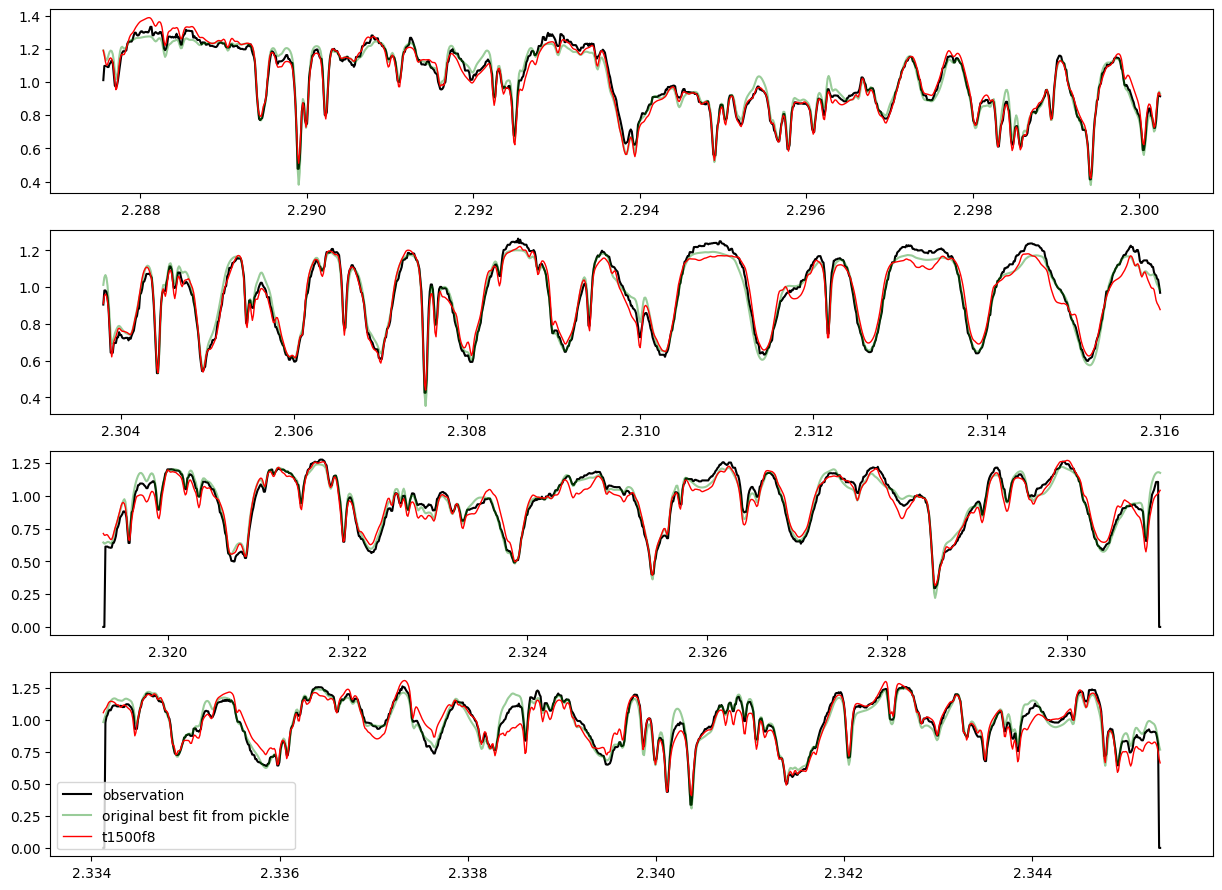

In [104]:
fig = plt.figure(figsize=(15,11))         
for j in np.arange(4):
    ax = fig.add_subplot(4,1,j+1)
    ax.plot(ft.lam_obs[j, :], ft.f_obs[j, :], color='black', label="observation")
    ax.plot(ft.lam_obs[j, :], ft.data['chipmods'][0, j, :], color='green', 
        alpha=0.4, linewidth=1.5, label="original best fit from pickle")
    ax.plot(ft.lam_obs[j, :], rescallie['t1500g1000f8_m0.0_co1.0.fits']['spec'][j], color="red",
        linewidth=1, label="t1500f8")
    #ax.plot(ft.lam_obs[j, :], rescallie['t1400g1000f4_m0.0_co1.0.fits']['spec'][j], linewidth=1, label="t1400f4")
plt.legend()

#### Contour plot

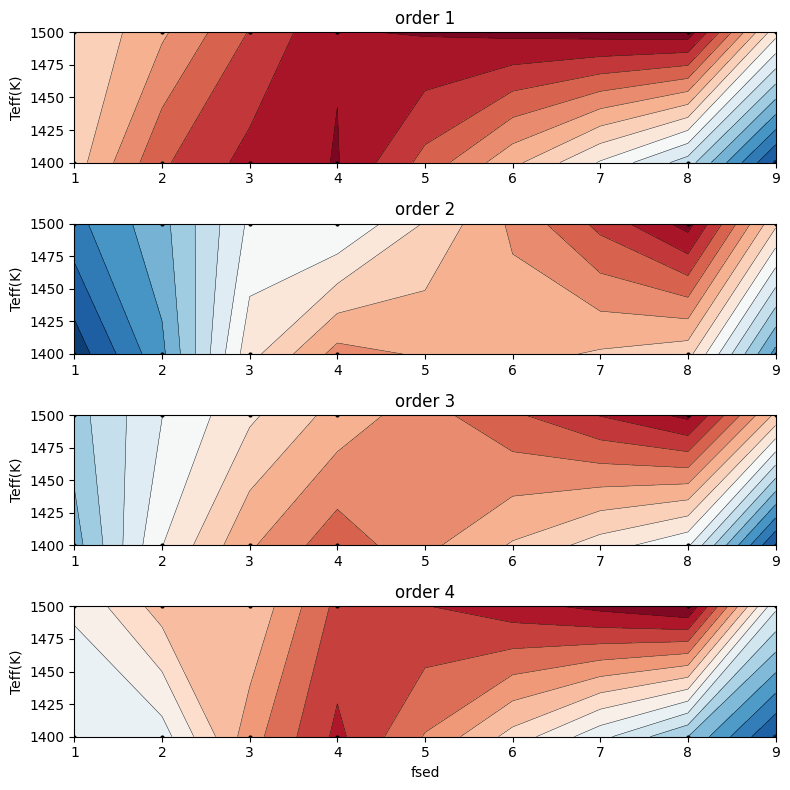

In [122]:
fig = plt.figure(figsize=(8, 8))
for band in range(4):
    plot_data={"Teff":[], "fsed":[], "fmin":[]}
    for key, value in rescallie.items():
        plot_data["Teff"].append(float(key[1:5]))
        try:
            fsed = float(key[11])
        except:
            fsed = 9
        plot_data["fsed"].append(fsed)
        plot_data["fmin"].append(value['fit'][band][1])

    from scipy.interpolate import griddata
    yi = np.arange(1400, 1600, 100)
    xi = np.arange(1, 10, 1)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((plot_data["fsed"], plot_data["Teff"]), plot_data["fmin"], (xi, yi), method='linear')
    plt.subplot(4,1, band+1)
    plt.contour(xi, yi, zi, levels=17, linewidths=0.3, colors='k')
    plt.contourf(xi, yi, zi, levels=17, cmap="RdBu")
    plt.plot(plot_data["fsed"], plot_data["Teff"], 'ko', ms=2)
    plt.ylabel("Teff(K)")
    plt.title(f"order {band+1}")
plt.xlabel("fsed")
#plt.colorbar(location='bottom')
fig.tight_layout()

#### Fit BTSettl Original CIFIST2015 models

In [4]:
modeldir = "BTSettlModels/CIFIST2015"
resall = ft.fit_many_models(
    datadir+modeldir, 
    include_telluric=True, 
    telluricfile=datadir+telluricfile)

fitting model lte013.0-3.0-0.0a+0.0.BT-Settl.spec.fits...


/Users/xqchen/workspace/dopplerimg/code/modelfitting.py:711: RuntimeWarning: invalid value encountered in sqrt
  ret = (4*(1.-epsilon) * np.sqrt(lamdel2) + np.pi*epsilon*lamdel2) / \


Optimization terminated successfully.
         Current function value: 206.707630
         Iterations: 2770
         Function evaluations: 3926
Optimization terminated successfully.
         Current function value: 86.946571
         Iterations: 3919
         Function evaluations: 5452
Optimization terminated successfully.
         Current function value: 196.184146
         Iterations: 5088
         Function evaluations: 7100
Optimization terminated successfully.
         Current function value: 108.607213
         Iterations: 6809
         Function evaluations: 9394
fitting model lte012.0-2.5-0.0a+0.0.BT-Settl.spec.fits...
Optimization terminated successfully.
         Current function value: 231.721027
         Iterations: 4023
         Function evaluations: 5601
Optimization terminated successfully.
         Current function value: 135.714988
         Iterations: 3048
         Function evaluations: 4300
Optimization terminated successfully.
         Current function value: 253.8278

In [81]:
# save as pickle
with open("result_fit_all_models.pickle", "wb") as f:
    pickle.dump(resall, f)

#### Print result fmins

In [13]:
# print band averaged
for key, item in resall.items():
    print(f"model:{key} fmin:{np.array([item['fit'][j][1] for j in range(4)]).mean()}")

model:lte013.0-3.0-0.0a+0.0.BT-Settl.spec.fits fmin:149.98568177255666
model:lte012.0-2.5-0.0a+0.0.BT-Settl.spec.fits fmin:189.82198895799547
model:lte013.0-3.5-0.0a+0.0.BT-Settl.spec.fits fmin:174.94000760097362
model:lte013.0-4.0-0.0a+0.0.BT-Settl.spec.fits fmin:170.4626406172922
model:lte012.0-5.5-0.0a+0.0.BT-Settl.spec.fits fmin:239.088827518436
model:lte013.0-4.5-0.0a+0.0.BT-Settl.spec.fits fmin:141.28343551213118
model:lte012.0-5.0-0.0a+0.0.BT-Settl.spec.fits fmin:143.6068060643356
model:lte012.0-3.0-0.0a+0.0.BT-Settl.spec.fits fmin:223.42369225214298
model:lte013.0-2.5-0.0a+0.0.BT-Settl.spec.fits fmin:112.51170693510619
model:lte012.0-3.5-0.0a+0.0.BT-Settl.spec.fits fmin:209.2034594169029
model:lte012.0-4.0-0.0a+0.0.BT-Settl.spec.fits fmin:131.9416841462899
model:lte013.0-5.5-0.0a+0.0.BT-Settl.spec.fits fmin:114.23552175374508
model:lte012.0-4.5-0.0a+0.0.BT-Settl.spec.fits fmin:118.0338364667632
model:lte013.0-5.0-0.0a+0.0.BT-Settl.spec.fits fmin:153.5676706551549
model:lte014.0

In [15]:
# print all bands
for key, item in resall.items():
    print(f"model:{key} fmin:{[item['fit'][j][1] for j in range(4)]}")

model:lte013.0-3.0-0.0a+0.0.BT-Settl.spec.fits fmin:[206.0205418886802, 87.15298231408278, 198.2573629139158, 108.51183997354781]
model:lte012.0-2.5-0.0a+0.0.BT-Settl.spec.fits fmin:[231.73078270350925, 135.71504208966724, 253.82868931119873, 138.01344172760676]
model:lte013.0-3.5-0.0a+0.0.BT-Settl.spec.fits fmin:[236.46905035869244, 106.70601893397102, 217.5317937119849, 139.0531673992461]
model:lte013.0-4.0-0.0a+0.0.BT-Settl.spec.fits fmin:[177.57979277948522, 110.11589810883999, 197.88295202741645, 196.27191955342724]
model:lte012.0-5.5-0.0a+0.0.BT-Settl.spec.fits fmin:[184.14245028834102, 149.76492499244858, 243.5639318807629, 378.88400291219153]
model:lte013.0-4.5-0.0a+0.0.BT-Settl.spec.fits fmin:[106.10731844071886, 116.20596543660572, 159.54899885134495, 183.27145931985524]
model:lte012.0-5.0-0.0a+0.0.BT-Settl.spec.fits fmin:[127.62207841452405, 88.55286424679838, 125.27776159415302, 232.9745200018669]
model:lte012.0-3.0-0.0a+0.0.BT-Settl.spec.fits fmin:[215.15773145470598, 142.

#### Plot best fit spectrum

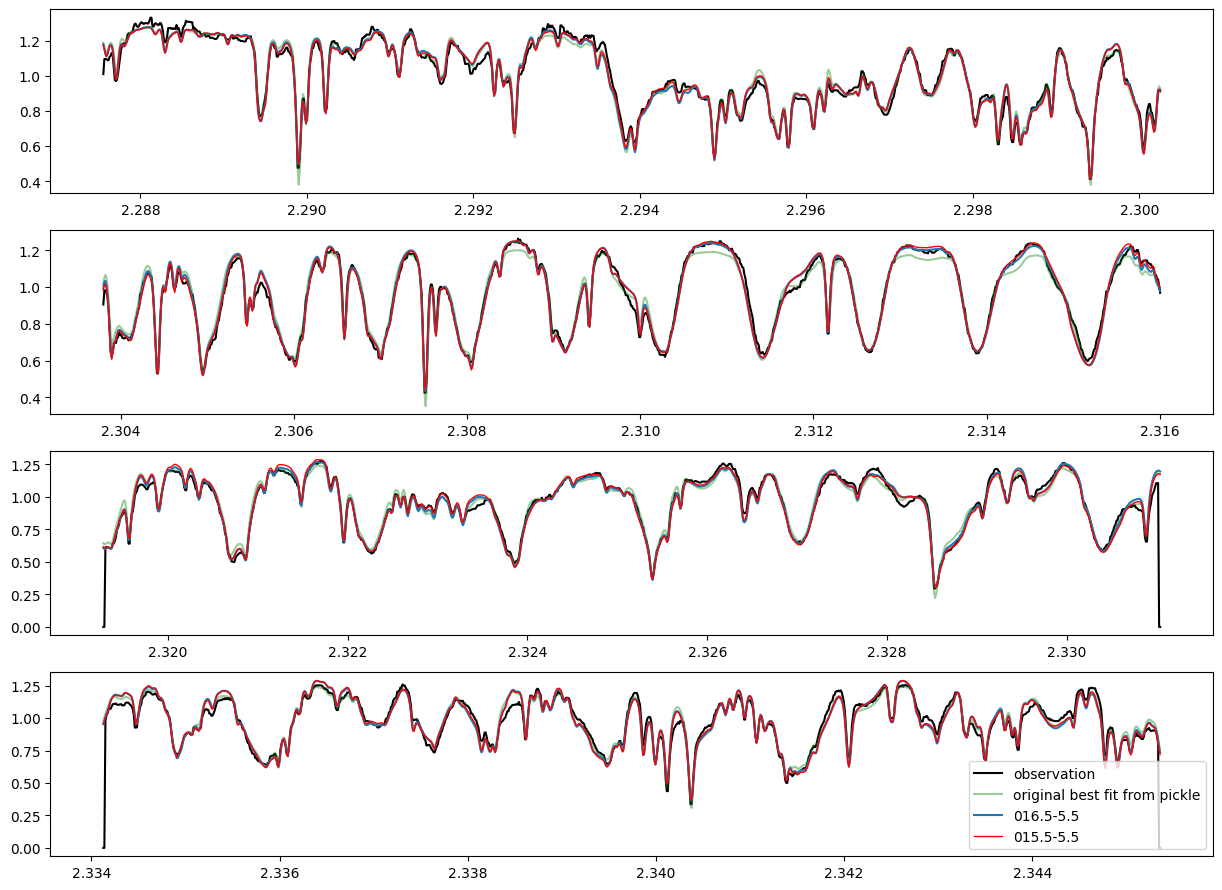

In [96]:
fig = plt.figure(figsize=(15,11))         
for j in np.arange(4):
    ax = fig.add_subplot(4,1,j+1)
    ax.plot(ft.lam_obs[j, :], ft.f_obs[j, :], color='black', label="observation")
    ax.plot(ft.lam_obs[j, :], ft.data['chipmods'][0, j, :], color='green', 
        alpha=0.4, linewidth=1.5, label="original best fit from pickle")
    ax.plot(ft.lam_obs[j, :], resall['lte016.5-5.5-0.0a+0.0.BT-Settl.spec.fits']['spec'][j], 
        linewidth=1.5, label="016.5-5.5")
    ax.plot(ft.lam_obs[j, :], resall['lte015.5-5.5-0.0a+0.0.BT-Settl.spec.fits']['spec'][j], 
        color="red",linewidth=1, label="015.5-5.5")
    
plt.legend()

#### Contour plot

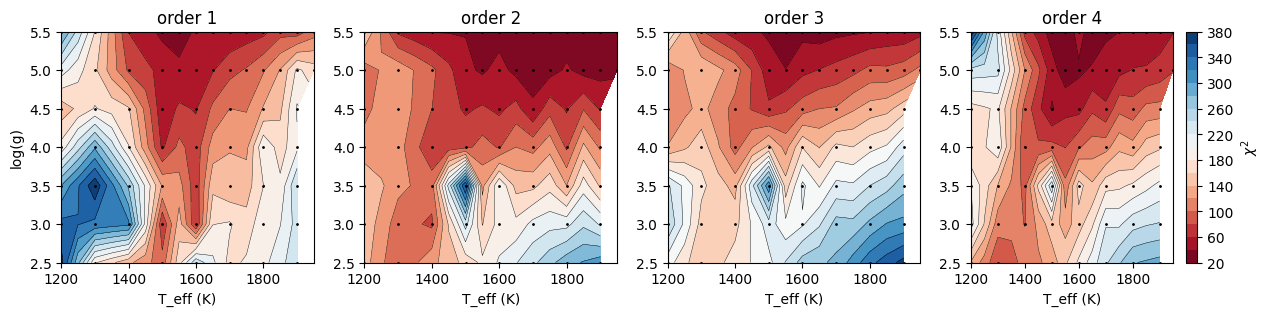

In [79]:
plt.figure(figsize=(15, 3))
for band in range(4):
    plot_data={"Teff":[], "log(g)":[], "fmin":[]}
    for key, value in resall.items():
        plot_data["Teff"].append(float(key[4:8])*100)
        plot_data["log(g)"].append(float(key.split("-")[1]))
        plot_data["fmin"].append(value['fit'][band][1])

    from scipy.interpolate import griddata
    xi = np.arange(1200, 2000, 50)
    yi = np.arange(2.5, 6.0, 0.5)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((plot_data["Teff"], plot_data["log(g)"]), plot_data["fmin"], (xi, yi), method='linear')
    plt.subplot(1,4, band+1)
    plt.contour(xi, yi, zi, levels=17, linewidths=0.3, colors='k')
    plt.contourf(xi, yi, zi, levels=17, cmap="RdBu")
    plt.plot(plot_data["Teff"], plot_data["log(g)"], 'ko', ms=1)
    plt.xlabel("T_eff (K)")
    if band == 0:
        plt.ylabel("log(g)")
    plt.title(f"order {band+1}")
plt.colorbar().set_label("$\chi^2$")